In [1]:
!pip install keras-tuner

In [2]:
pip install --upgrade pip setuptools wheel


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install matplotlib opencv-python

In [5]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aesara                            2.9.4
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-proj

In [6]:
import tensorflow as tf
import os

In [7]:
!pip install tensorflow-macos


In [8]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aesara                            2.9.4
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-proj

## Data loading

In [10]:
import cv2
# import imghdr
!pip install pillow
from PIL import Image

In [11]:
data_dir='data'

In [12]:
image_exts=['jpeg','jpg','png','bmp']

In [13]:
os.listdir(os.path.join(data_dir,'happy'))

['images26.jpg',
 'images32.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '05-12-21-happy-people.jpg',
 'image22.jpeg',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 'physed-happiness-facebookJumbo.jpg',
 '170404-happy-workers-feature.jpg',
 'images33.jpg',
 'images27.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'images25.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'images19.jpg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902587.jpg',
 'o-HAPPY-facebook.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'happy-people-13772392.jpg',
 'images18.jpg',
 'images24.jpg',
 'images30.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'images34.jpg',
 'maxresdefault2.jpg',
 'images20.jpg',
 'bigstock-Portrait-Of

In [14]:
img=cv2.imread(os.path.join('data','happy','154006829.jpg'))
img.shape

(3744, 5616, 3)

In [15]:
from matplotlib import pyplot as plt

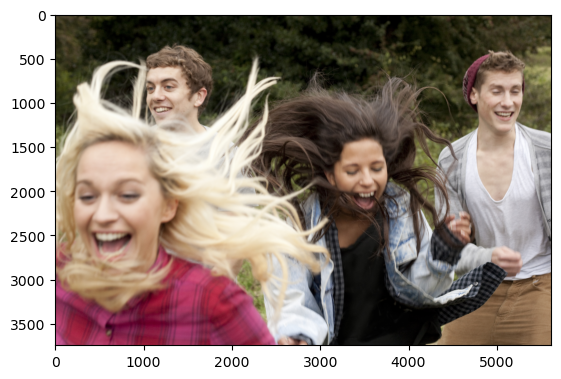

In [16]:
plt.imshow(img) #This is because it has a default coding of bgr
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Removing doggy images

In [18]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue
    for image in os.listdir(class_dir):
        image_path=os.path.join(data_dir,image_class,image)
        if not os.path.isfile(image_path):
            continue
        try:
            img=cv2.imread(image_path)
            tip=Image.open(image_path).format.lower()
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            print(f'Error: {e}') 

### Data statistics

In [20]:
def canny_edge_detection(frame): 
    # Convert the frame to grayscale for edge detection 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
      
    # Apply Gaussian blur to reduce noise and smoothen edges 
    blurred = cv2.GaussianBlur(src=gray, ksize=(3, 5), sigmaX=0.5) 
      
    # Perform Canny edge detection 
    edges = cv2.Canny(blurred, 70, 135) 
      
    return blurred, edges

In [21]:
blurred,edge=canny_edge_detection(img)

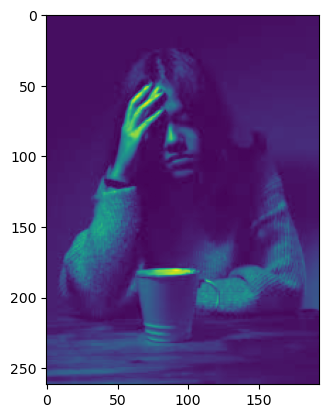

In [22]:
plt.imshow(blurred)

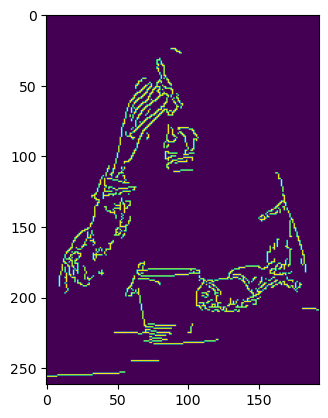

In [23]:
plt.imshow(edge)

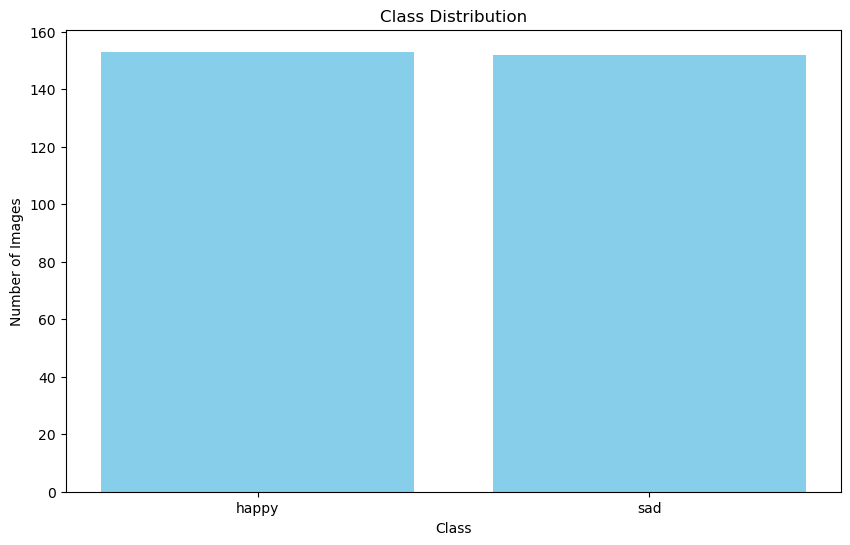

In [24]:
def plot_class_distribution(data_dir):
    class_counts = {}
    
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.show()

# Usage
data_dir = 'data'
plot_class_distribution(data_dir)

Processing class: happy
Processing class: sad
Mean Pixel Value: 130.42
Standard Deviation of Pixel Values: 80.81


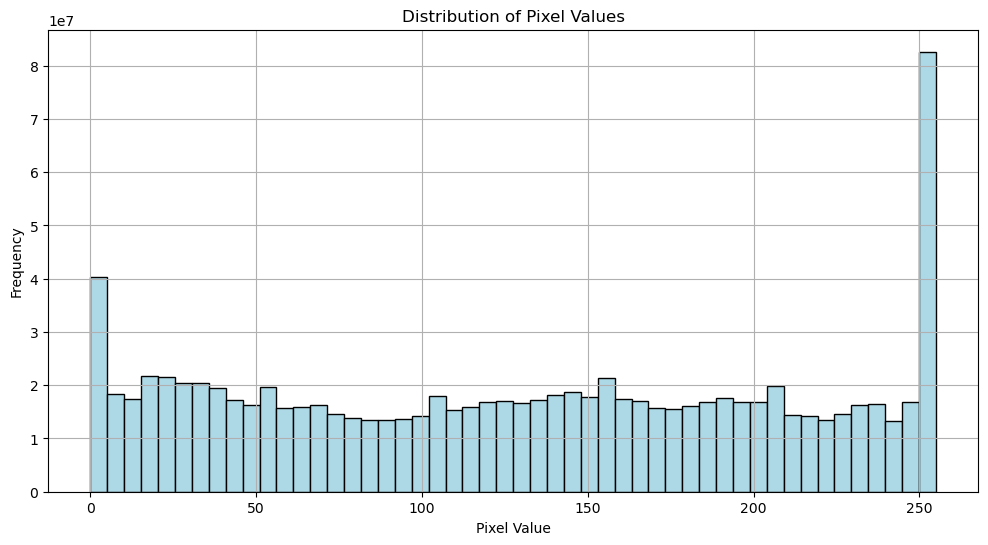

In [25]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def compute_image_statistics(data_dir):
    pixel_values = []
    
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            print(f"Processing class: {class_name}")
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    with Image.open(img_path) as img:
                        img_array = np.array(img)
                        if len(img_array.shape) == 3:  # Color images
                            pixel_values.extend(img_array.flatten())
                        elif len(img_array.shape) == 2:  # Grayscale images
                            pixel_values.extend(img_array.flatten())
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")

    pixel_values = np.array(pixel_values)
    
    if len(pixel_values) == 0:
        print("No pixel values found. Ensure images are correctly loaded.")
        return

    # Compute statistics
    mean = np.mean(pixel_values)
    std_dev = np.std(pixel_values)
    
    print(f"Mean Pixel Value: {mean:.2f}")
    print(f"Standard Deviation of Pixel Values: {std_dev:.2f}")

    # Plot histogram of pixel values
    plt.figure(figsize=(12, 6))
    plt.hist(pixel_values, bins=50, color='lightblue', edgecolor='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Pixel Values')
    plt.grid(True)
    plt.show()

# Usage
data_dir = 'data'  # Update with your dataset directory
compute_image_statistics(data_dir)


In [26]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [29]:
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32,
    verbose=1  # Set to 1 to enable detailed logging
)


Found 305 files belonging to 2 classes.


## Iterating and batching data

In [31]:
data_iterator=data.as_numpy_iterator()  #for iterating in the data so as to access the daata

In [32]:
#For getting batch from the data
batch=data_iterator.next()

In [33]:
batch

(array([[[[2.30000000e+01, 2.50000000e+01, 2.20000000e+01],
          [2.39453125e+01, 2.59453125e+01, 2.29453125e+01],
          [2.82421875e+01, 3.02421875e+01, 2.72421875e+01],
          ...,
          [8.97265625e+01, 8.67265625e+01, 6.97265625e+01],
          [7.68359375e+01, 7.38359375e+01, 5.68359375e+01],
          [7.40000000e+01, 7.10000000e+01, 5.40000000e+01]],
 
         [[2.35156250e+01, 2.55156250e+01, 2.25156250e+01],
          [2.44092407e+01, 2.64092407e+01, 2.34092407e+01],
          [2.84711304e+01, 3.04711304e+01, 2.74711304e+01],
          ...,
          [9.54917603e+01, 9.23688965e+01, 7.53198853e+01],
          [8.34403687e+01, 8.04182129e+01, 6.32684937e+01],
          [8.07890625e+01, 7.77890625e+01, 6.06171875e+01]],
 
         [[2.58593750e+01, 2.78593750e+01, 2.48593750e+01],
          [2.65180054e+01, 2.85180054e+01, 2.55180054e+01],
          [2.95117798e+01, 3.15117798e+01, 2.85117798e+01],
          ...,
          [1.21697205e+02, 1.18015869e+02, 1.0074

In [34]:
 len(batch)

2

In [35]:
#Class 0 is for happy
#Class 1 is for sad
batch[0].shape #Images represented as numpy arrays

(32, 256, 256, 3)

In [36]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

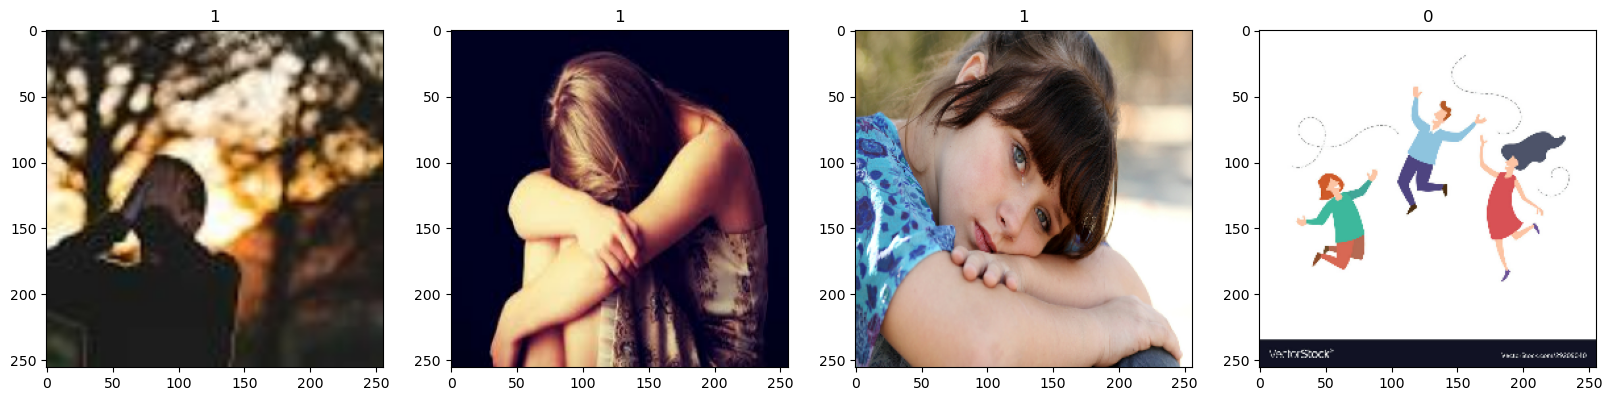

In [37]:

fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Processing of data

In [39]:
#Scaling data
data=data.map(lambda x,y:(x/255,y))

In [40]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

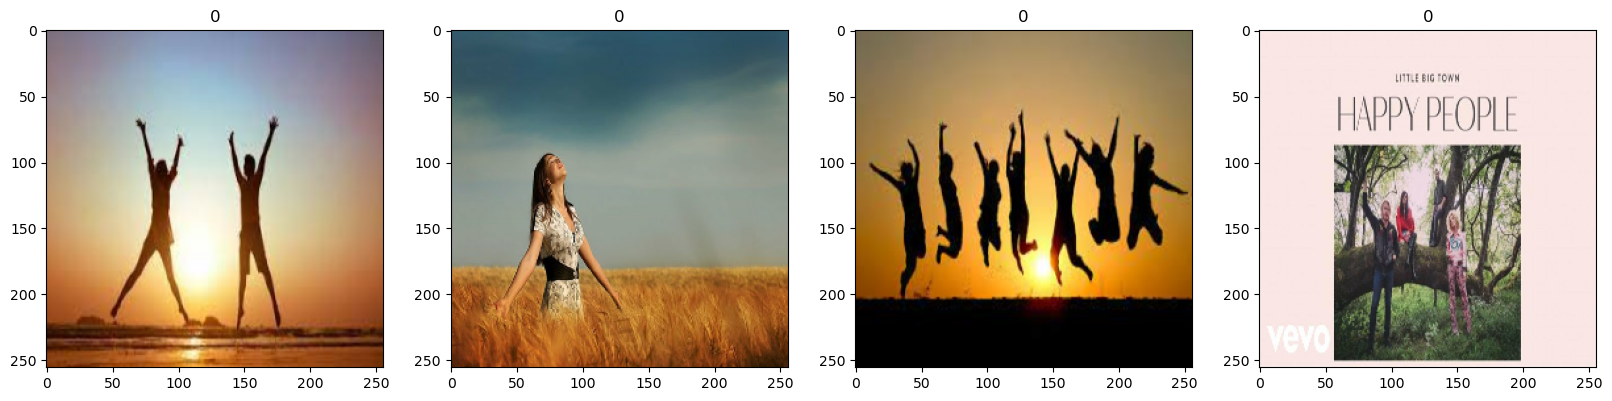

In [41]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [42]:
batch[0].min()

0.0

### Spliting Data

In [44]:
len(data)

10

In [45]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)


In [46]:
test_size+train_size+val_size

10

In [47]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [48]:
len(val)

2

### Logistic and SVM

In [50]:
# Import necessary libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split


# Set up image data generator
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load the images and resize them to match the input size of VGG16 (224x224)
image_size = (224, 224)
batch_size = 32

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification (happy/sad)
    shuffle=True
)

# Load pre-trained VGG16 without the top layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using VGG16
features = vgg_model.predict(train_generator)

# Flatten the features for logistic regression and SVM
X = features.reshape(features.shape[0], -1)
y = train_generator.classes  # Labels (happy=0, sad=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Found 305 images belonging to 2 classes.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step


In [51]:
!pip install pymc

In [52]:
!pip install aesara


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model to the training data
log_reg_model.fit(X_train_scaled, y_train)

# Predict the labels for the training set
y_pred_train = log_reg_model.predict(X_train_scaled)
y_pred_test = log_reg_model.predict(X_test_scaled)


# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


# Print the accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# If you want to test it on a validation or test set:
# y_pred_test = log_reg_model.predict(X_test_scaled)
# test_accuracy = accuracy_score(y_test, y_pred_test)
# print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9959
Test Accuracy: 0.4262


In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.01, 0.1, 1, 10],  # Only for 'rbf' kernel
    'svm__kernel': ['linear', 'rbf', 'poly']  # Try different kernels
}

# Create a pipeline with SMOTE and SVM
pipeline = Pipeline([
    ('smote', smote),
    ('svm', svm_model)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Predict on the test set
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

# Evaluate the SVM model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")

# Print additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Best parameters found: {'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kernel': 'linear'}
Best cross-validation accuracy: 0.5289965986394558
SVM Accuracy: 40.98%
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.32      0.36        31
           1       0.42      0.50      0.45        30

    accuracy                           0.41        61
   macro avg       0.41      0.41      0.41        61
weighted avg       0.41      0.41      0.41        61

Confusion Matrix:
 [[10 21]
 [15 15]]


## Model Building

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [73]:
model=Sequential()

In [74]:
#1->is a stride(moving of filter is 1px)
#3,3->filter size
#16->number of filter
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())#MaxPooling is for taking max value for each iteration

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())#flatten is for 

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#as dense layer is the output layer so it has a sigmoid funtion to classify sad or happy

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
logdir='logs'

In [78]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [79]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - accuracy: 0.4543 - loss: 1.4125 - val_accuracy: 0.5625 - val_loss: 0.6865
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.5746 - loss: 0.6741 - val_accuracy: 0.6719 - val_loss: 0.6636
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 411ms/step - accuracy: 0.6754 - loss: 0.6479 - val_accuracy: 0.7500 - val_loss: 0.5336
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.6330 - loss: 0.6224 - val_accuracy: 0.8281 - val_loss: 0.5342
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.7855 - loss: 0.5236 - val_accuracy: 0.7812 - val_loss: 0.4774
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.8136 - loss: 0.4531 - val_accuracy: 0.8125 - val_loss: 0.5023
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.8741 - loss: 0.3809 - val_accuracy: 0.8594 - val_loss: 0.3246
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.8785 - loss: 0.3055 - val_accuracy: 0.9375 - val_loss:

### Plot Performance

In [81]:
hist.history

{'accuracy': [0.4598214328289032,
  0.5892857313156128,
  0.6428571343421936,
  0.6919642686843872,
  0.75,
  0.8169642686843872,
  0.8883928656578064,
  0.8794642686843872,
  0.9419642686843872,
  0.9821428656578064,
  0.9821428656578064,
  0.9598214030265808,
  0.9866071343421936,
  0.9821428656578064,
  1.0,
  1.0,
  0.9955357313156128,
  0.9910714030265808,
  0.9910714030265808,
  1.0],
 'loss': [1.2661263942718506,
  0.6722152829170227,
  0.6523884534835815,
  0.5952284932136536,
  0.5418071150779724,
  0.46007877588272095,
  0.3575217127799988,
  0.3017914593219757,
  0.21971316635608673,
  0.13703326880931854,
  0.10509689897298813,
  0.11404216289520264,
  0.08692184835672379,
  0.05478359013795853,
  0.02546367235481739,
  0.012024054303765297,
  0.027379149571061134,
  0.023564249277114868,
  0.020157000049948692,
  0.008704563602805138],
 'val_accuracy': [0.5625,
  0.671875,
  0.75,
  0.828125,
  0.78125,
  0.8125,
  0.859375,
  0.9375,
  1.0,
  0.984375,
  0.9375,
  1.0,
  

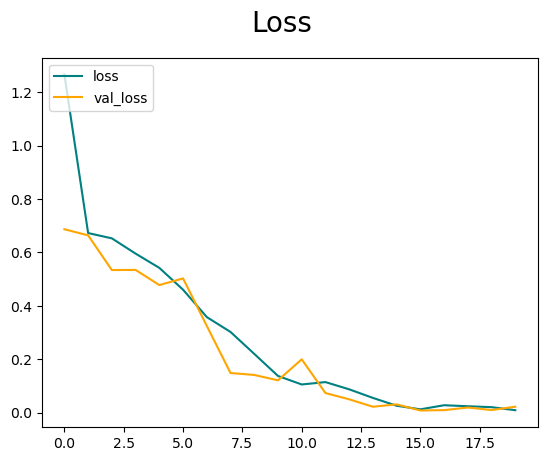

In [82]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()


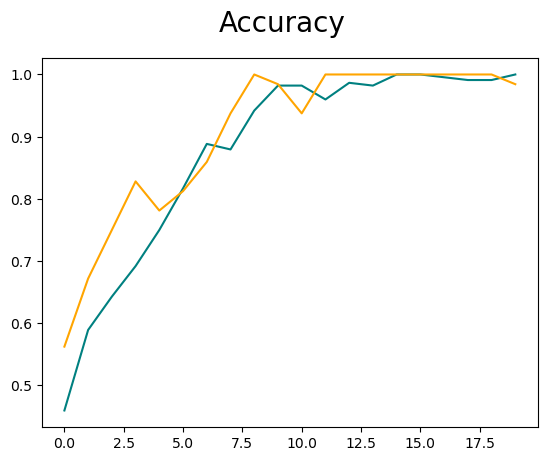

In [83]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.show()


### Evaluate Performance

In [85]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [86]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [87]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


2024-10-24 01:16:22.843460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [88]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

1.0 1.0 1.0


### Test

In [90]:
import cv2

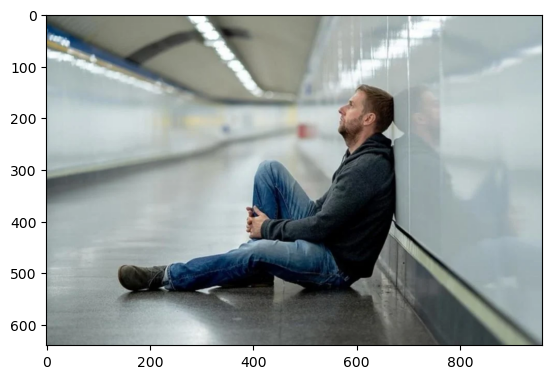

In [91]:
img=cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

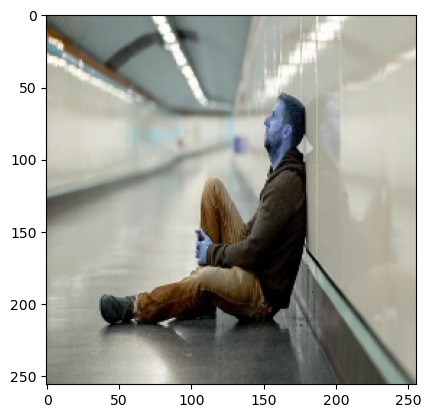

In [92]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [93]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [94]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [95]:
yhat

array([[0.7233886]], dtype=float32)

In [96]:
if yhat>0.5:
    print('Predicted class is Sad!')
else:
    print('Predicted class is Happy!')

Predicted class is Sad!


## Save the model

In [98]:
from tensorflow.keras.models import load_model

In [99]:
model.save(os.path.join('models','EmotionClassification.h5'))

In [100]:
new_model=load_model(os.path.join('models','EmotionClassification.h5'))

In [101]:
new_model

<Sequential name=sequential, built=True>

In [102]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.7233886]], dtype=float32)